# TD04 : Points d'intérêts

We begin by loading the "camera" picture to have a basis on which to work on

In [5]:
from skimage import data, io, util

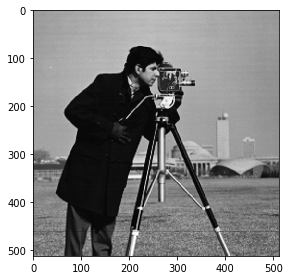

In [6]:
cam = data.camera()
cam = util.img_as_float(cam)
io.imshow(cam)

We compute the derivatives of this image according to Sobel kernels. We chos the constant mode to accomodate the borders.

In [15]:
from scipy.ndimage.filters import convolve
import numpy as np
import matplotlib.pyplot as plt

In [10]:
gx = np.array([[-1, 0 ,1], [-2, 0 ,2], [-1,0 ,1]])
gy = np.transpose(gx)
print(gx)
print(gy)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


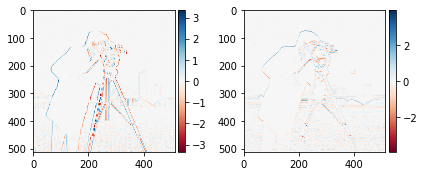

In [27]:
ix = convolve(cam, gx, mode='constant')
iy = convolve(cam, gy, mode='constant')
fig = plt.figure()
fig.add_subplot(1,2,1)
io.imshow(ix)
fig.add_subplot(1,2,2)
io.imshow(iy)
plt.show()

We then compute the structur tensor M, with each component being the result of a convolve with a gaussian kernel, which will blur the inputs


In [29]:
from scipy.ndimage.filters import gaussian_filter as gf

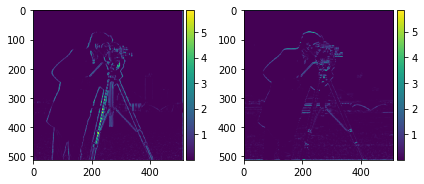

In [37]:
axx = gf(ix*ix, 1, mode = 'constant')
ayy = gf(iy*iy, 1, mode = 'constant')
axy = gf(ix*iy, 1, mode = 'constant')
fig = plt.figure()
fig.add_subplot(1,2,1)
io.imshow(axx)
fig.add_subplot(1,2,2)
io.imshow(ayy)
plt.show()

We compute the Harris response, which will indicate the corners :

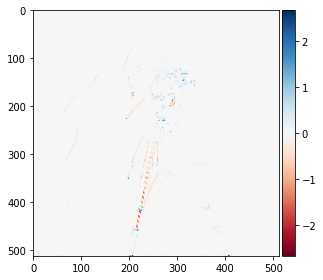

In [47]:
detm = axx * ayy - axy * axy
trm = axx + axy
k = 0.05
R = detm - k * (trm * trm)
io.imshow(R)

A pixel is said to be a local maxima if in a windows W centered on this pixel the response is max. We will use a maximum filter to see thoses maximas in windows of size (3,3)

In [48]:
from scipy.ndimage.filters import maximum_filter as mf

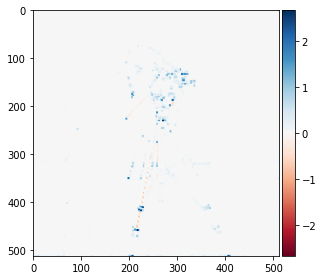

In [49]:
maxr = mf(R, size = 3)
io.imshow(maxr)

Note: better to use corner_harris from skimage from now on

In [60]:
from skimage.color import gray2rgb

2.3501073238249797
3.511429775510096e-08


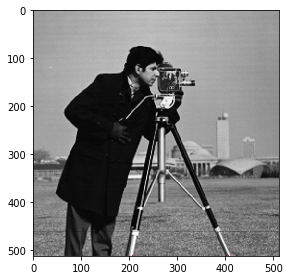

In [86]:
# we start by setting a threshold for plotting
flat = np.ravel(maxr)
flat = np.sort(flat)
flat = flat[::-1]
print(flat[30])
print(maxr[150,170])
#this will plot all the invariant maximums
irgb = gray2rgb(cam)
for i in range(0,irgb.shape[0]):
    for j in range(0,irgb.shape[1]):
        if(R[i,j] == maxr[i,j] and maxr[i,j] >= flat[100]):
            irgb[i,j,:] = [1,0,0]
io.imshow(irgb)